# Period Detective Exercise

## Overview
* Once you download and extract the .zip file ```light_curves.zip```, you will find a file inside it called ```key.csv``` which importantly contains a column of stellar identifiers for the 323 stars that have data in the ```light_curves/light_curves``` directory you will be working with in this exercise. 
* Your goal is to iterate through each of the object's ```_r.csv``` files (e.g. the file for the star ```2MASS_J20470481+4349114``` would be ```2MASS_J20470481+4349114_r.csv```), run the Lomb-Scargle periodogram on that light curve, return a list of stars whose lightcurves are periodic (for now we will assume stars whose peak power is more than 0.5 to have significant periods), and then make phase-folded light curve plots for those stars, as well as making a histogram displaying the distribution of periods among those stars with significant periods. 
* As a first step, I talk a glance through this Astropy documentation example which explores the Lomb-Scargle Algorithm with simulated data: [link](https://docs.astropy.org/en/stable/timeseries/lombscargle.html). 
* Once you're done, please make a new folder in the ```./solutions``` directory of this project and put your code and plots in it so we can practice using GitHub. 

## Code Hints
* Run the Lomb-Scargle Algorithm like this (after extracting the ```mjd``` and ```mag``` arrays from the .csv file and importing ```LombScargle``` with ```from astropy.timeseries import LombScargle```): 
```python
ls = LombScargle(mjd, mag)
frequencies, powers = ls.autopower(minimum_frequency=0.05, maximum_frequency=0.5)
periods = 1/frequencies
```
* Setting ```minimum_frequency=0.05``` and ```maximum_frequency=0.5``` will restrict your search space between periods of two and fifty days (as period = 1/frequency, the maximum frequency $0.5$ is the shortest period $\frac{1}{0.5}=2$). 
* You want to focus on the period with the highest power for each light curve, and (as mentioned), for the purposes of this excercise only consider a period with power $>0.5$ to be significant. 
* Note that since lower values are brighter in the magnitude system, you'll want to invert the y-axis of your light curve plot. 
* You can save plots in matplotlib with ```plt.savefig()```


## Example Outputs
* Phase-folded light curve:  
![]()

* Periods distribution histogram:  
![]()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

root_dir = r"C:/Users/Research/Downloads/light_curves"
ids = np.array(pd.read_csv(root_dir+'/key.csv')['ID'])

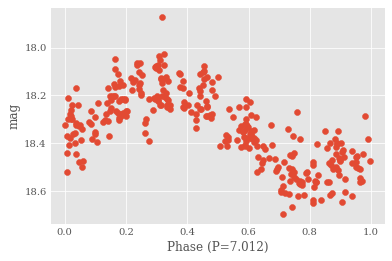

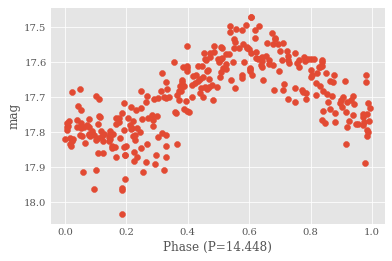

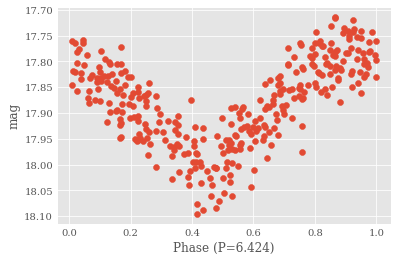

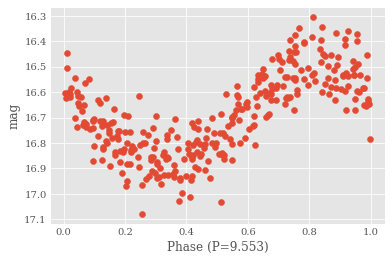

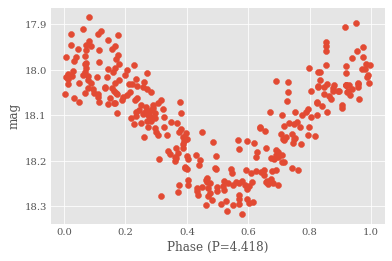

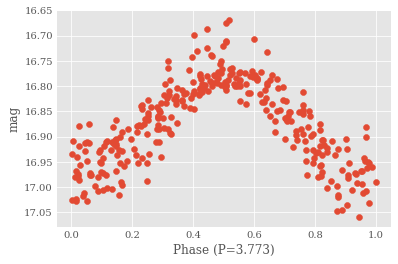

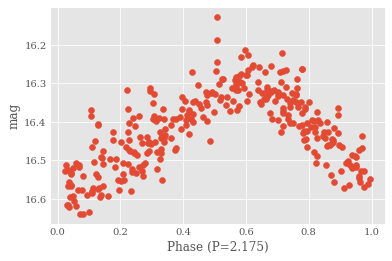

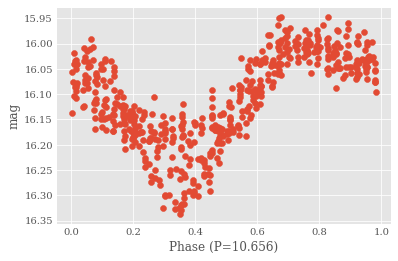

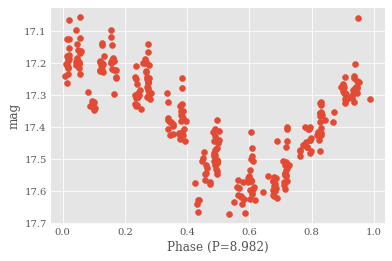

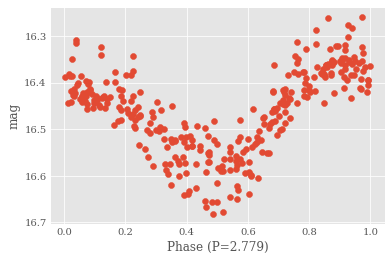

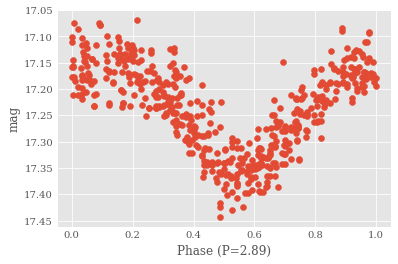

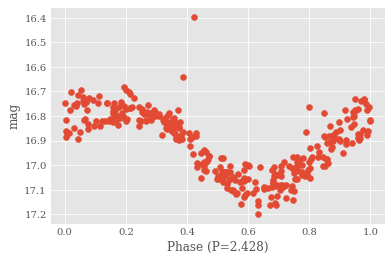

In [35]:
periodic_ids = np.array([])
best_periods = np.array([])
best_powers = np.array([])

for id in ids: 
    data_df = pd.read_csv(root_dir+r'\\light_curves\\'+id+'_r.csv')
    mjds = np.array(data_df['mjd'])
    mags = np.array(data_df['mag'])

    ls = LombScargle(mjds, mags)
    frequencies, powers = ls.autopower(minimum_frequency=0.05, maximum_frequency=0.5)
    periods = 1/frequencies

    best_period, best_power = periods[np.argmax(powers)], np.max(powers)

    if best_power > 0.5: 
        periodic_ids = np.append(periodic_ids, id)
        best_periods = np.append(best_periods, best_period)
        best_powers = np.append(best_powers, best_power)

        phased_dates = np.mod(mjds, best_period)/best_period

        plt.rcParams['font.family']='serif'
        plt.style.use('ggplot')
        plt.scatter(phased_dates, mags)
        plt.xlabel('Phase (P='+str(round(best_period, 3))+')')
        plt.ylabel('mag')
        plt.gca().invert_yaxis()
        plt.show()



## Notes
* If you want to phase a light curve to a period ```T``` and plot it, use this formula: ```phased_dates = np.mod(dates, T)/T```. Then to plot this, just scatter ```phased_dates``` as ```x``` and ```mags``` as ```y```. 

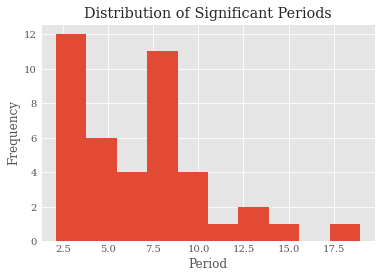

In [32]:
plt.rcParams['font.family']='serif'
plt.style.use('ggplot')
plt.xlabel('Period')
plt.ylabel('Frequency')
plt.title('Distribution of Significant Periods')
plt.hist(best_periods)
plt.savefig('period_dist.png')